In [25]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os
import random

# Update to your model's best weights and images locations
train_results_path = os.path.join(r"/home", "tjriz", "Documents", "Senior-Design", "YOLOv11_training_SADD", "runs", "detect")
test_images_200_path = os.path.join(r"/home", "tjriz", "Documents", "Senior-Design", "datasets", "SADD", "hust-rslab-SAR-aircraft-data.v2i.yolov11.resize200", "test", "images")
best_weight_200_path = os.path.join(train_results_path, "airplane_detection_resize200_2", "weights", "best.pt")
test_images_224_path = os.path.join(r"/home", "tjriz", "Documents", "Senior-Design", "datasets", "SADD", "hust-rslab-SAR-aircraft-data.v2i.yolov11.newsplit", "test", "images")
best_weight_224_path = os.path.join(train_results_path, "airplane_detection_2", "weights", "best.pt")
test_images_640_path = os.path.join(r"/home", "tjriz", "Documents", "Senior-Design", "datasets", "SADD", "hust-rslab-SAR-aircraft-data.v2i.yolov11.resize640", "test", "images")
best_weight_640_path = os.path.join(train_results_path, "airplane_detection_resize640_newsplit", "weights", "best.pt")


test_image_files = [f for f in os.listdir(test_images_200_path) if f.endswith('.jpg')]
test_image_name = random.choice(test_image_files)
# For explicitly defining
# test_image_name = "00027_bmp.rf.b2d5ae8fc24f145a0c46c283e0783a0c.jpg"

print(test_image_name)

02544_bmp.rf.70f635e62d51bc7620ccd8f7ff65842c.jpg



image 1/1 /home/tjriz/Documents/Senior-Design/datasets/SADD/hust-rslab-SAR-aircraft-data.v2i.yolov11.resize200/test/images/02544_bmp.rf.70f635e62d51bc7620ccd8f7ff65842c.jpg: 224x224 9 airplanes, 4.5ms
Speed: 0.4ms preprocess, 4.5ms inference, 0.6ms postprocess per image at shape (1, 3, 224, 224)

Original labeled detections for test image (contents of annotation file):
0 0.16741071428571427 0.21205357142857142 0.19196428571428573 0.14732142857142858

0 0.17633928571428573 0.421875 0.19196428571428573 0.14732142857142858

0 0.16964285714285715 0.6361607142857143 0.1875 0.17410714285714285

0 0.5915178571428571 0.20982142857142858 0.16517857142857142 0.11607142857142858

0 0.5848214285714286 0.43080357142857145 0.16071428571428573 0.12053571428571429
Expected number of detections: 5


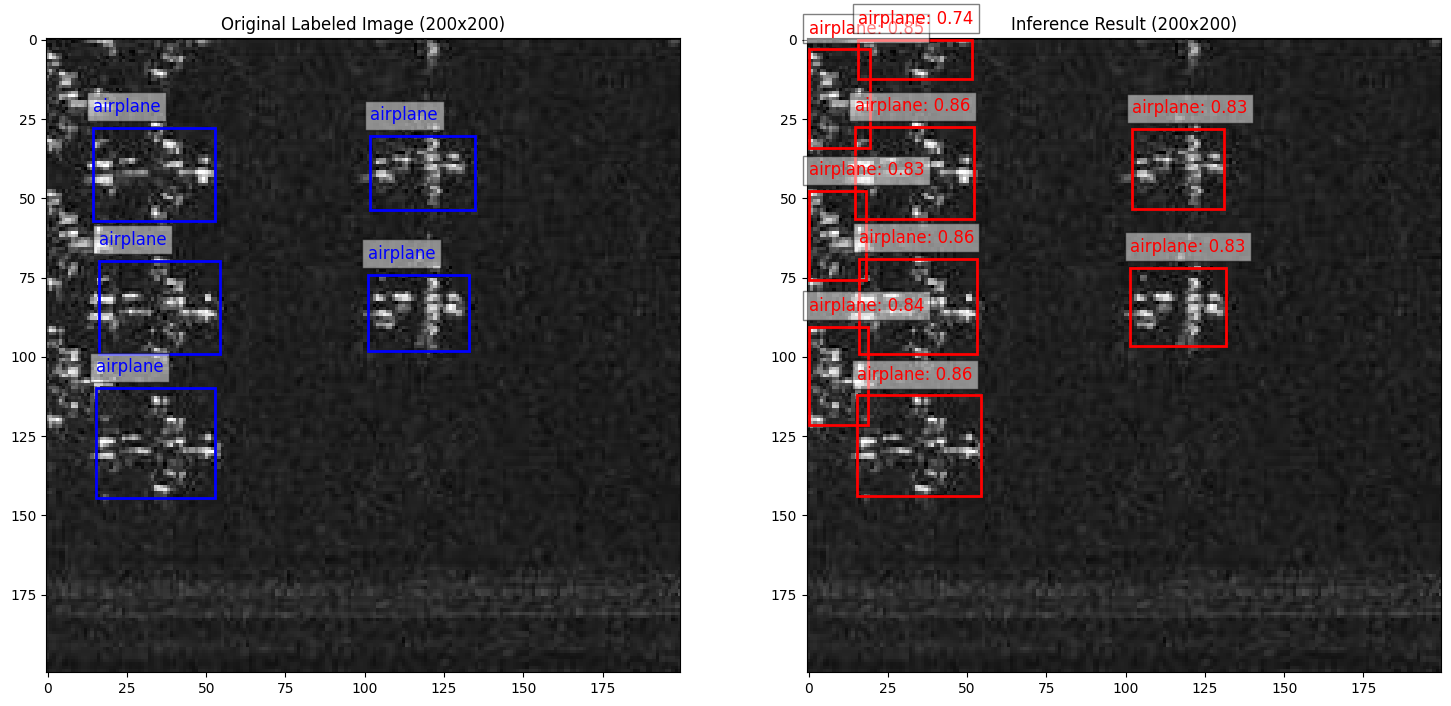

Inference Detections:
{'class': 'airplane', 'confidence': 0.8604691624641418, 'bbox': [15.774188995361328, 69.03111267089844, 53.17897033691406, 99.20389556884766]}
{'class': 'airplane', 'confidence': 0.8574953675270081, 'bbox': [15.299333572387695, 112.18817901611328, 54.40190887451172, 143.8340301513672]}
{'class': 'airplane', 'confidence': 0.8550799489021301, 'bbox': [14.601455688476562, 27.536989212036133, 52.08378982543945, 56.566741943359375]}
{'class': 'airplane', 'confidence': 0.8531781435012817, 'bbox': [0.0, 3.0062026977539062, 19.27389144897461, 34.077659606933594]}
{'class': 'airplane', 'confidence': 0.8380314707756042, 'bbox': [0.014529909007251263, 90.47840881347656, 18.619775772094727, 121.51031494140625]}
{'class': 'airplane', 'confidence': 0.8337568044662476, 'bbox': [0.0, 47.68953323364258, 18.02584457397461, 75.73851013183594]}
{'class': 'airplane', 'confidence': 0.8334368467330933, 'bbox': [102.01513671875, 28.156558990478516, 131.10951232910156, 53.301429748535156]

In [26]:
# Load the trained YOLO model with the best weights for 200x200 image size
model = YOLO(best_weight_200_path)

test_image_path = os.path.join(test_images_200_path, test_image_name)

# Perform inference on the test image
results = model(test_image_path)  # Perform detection
detections = results[0].boxes  # Retrieve detection results from the first (and only) image

# Collect the detections in a structured format
detection_list = []
for box in detections:
    x_min, y_min, x_max, y_max = box.xyxy[0].tolist()  # Get bounding box coordinates
    confidence = box.conf[0].item()  # Get confidence score
    class_id = int(box.cls[0].item())  # Get class ID
    class_name = model.names[class_id]  # Get the class name using the model's label dictionary
    detection = {
        'class': class_name,
        'confidence': confidence,
        'bbox': [x_min, y_min, x_max, y_max]  # Format as [x_min, y_min, x_max, y_max]
    }
    detection_list.append(detection)

# Path to the corresponding label file
label_path = os.path.join(test_images_200_path.replace('images', 'labels'), test_image_name.replace('.jpg', '.txt'))

# Load original bounding boxes from the label file
original_boxes = []
with Image.open(test_image_path) as img:
    img_width, img_height = img.size
    
if os.path.exists(label_path):
    print("\nOriginal labeled detections for test image (contents of annotation file):")
    with open(label_path, 'r') as f:
        for line in f:
            print(line)
            parts = line.split()
            class_id = int(parts[0])
            x_center, y_center, width, height = map(float, parts[1:])
            x_min = (x_center - width / 2) * img_width
            y_min = (y_center - height / 2) * img_height
            x_max = x_min + width * img_width
            y_max = y_min + height * img_height
            original_boxes.append({
                'class': model.names[class_id],
                'bbox': [x_min, y_min, x_max, y_max]
            })

print("Expected number of detections:", len(original_boxes))

# Display the test image with both inference and original labeled bounding boxes side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

# Plot original labeled image
with Image.open(test_image_path) as img:
    ax1.imshow(img)
    for box in original_boxes:
        x_min, y_min, x_max, y_max = box['bbox']
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='blue', facecolor='none')
        ax1.add_patch(rect)
        ax1.text(x_min, y_min - 5, box['class'], color='blue', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    ax1.set_title('Original Labeled Image (200x200)')

# Plot inference result
with Image.open(test_image_path) as img:
    ax2.imshow(img)
    for det in detection_list:
        x_min, y_min, x_max, y_max = det['bbox']
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='red', facecolor='none')
        ax2.add_patch(rect)
        label = f"{det['class']}: {det['confidence']:.2f}"
        ax2.text(x_min, y_min - 5, label, color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_title('Inference Result (200x200)')

plt.show()

# Print detection list for inference results
print("Inference Detections:")
for det in detection_list:
    print(det)
print("Number of inference detections:", len(detection_list))


image 1/1 /home/tjriz/Documents/Senior-Design/datasets/SADD/hust-rslab-SAR-aircraft-data.v2i.yolov11.newsplit/test/images/02544_bmp.rf.70f635e62d51bc7620ccd8f7ff65842c.jpg: 224x224 9 airplanes, 4.9ms
Speed: 0.3ms preprocess, 4.9ms inference, 0.6ms postprocess per image at shape (1, 3, 224, 224)

Original labeled detections for test image (contents of annotation file):
0 0.16741071428571427 0.21205357142857142 0.19196428571428573 0.14732142857142858

0 0.17633928571428573 0.421875 0.19196428571428573 0.14732142857142858

0 0.16964285714285715 0.6361607142857143 0.1875 0.17410714285714285

0 0.5915178571428571 0.20982142857142858 0.16517857142857142 0.11607142857142858

0 0.5848214285714286 0.43080357142857145 0.16071428571428573 0.12053571428571429
Expected number of detections: 5


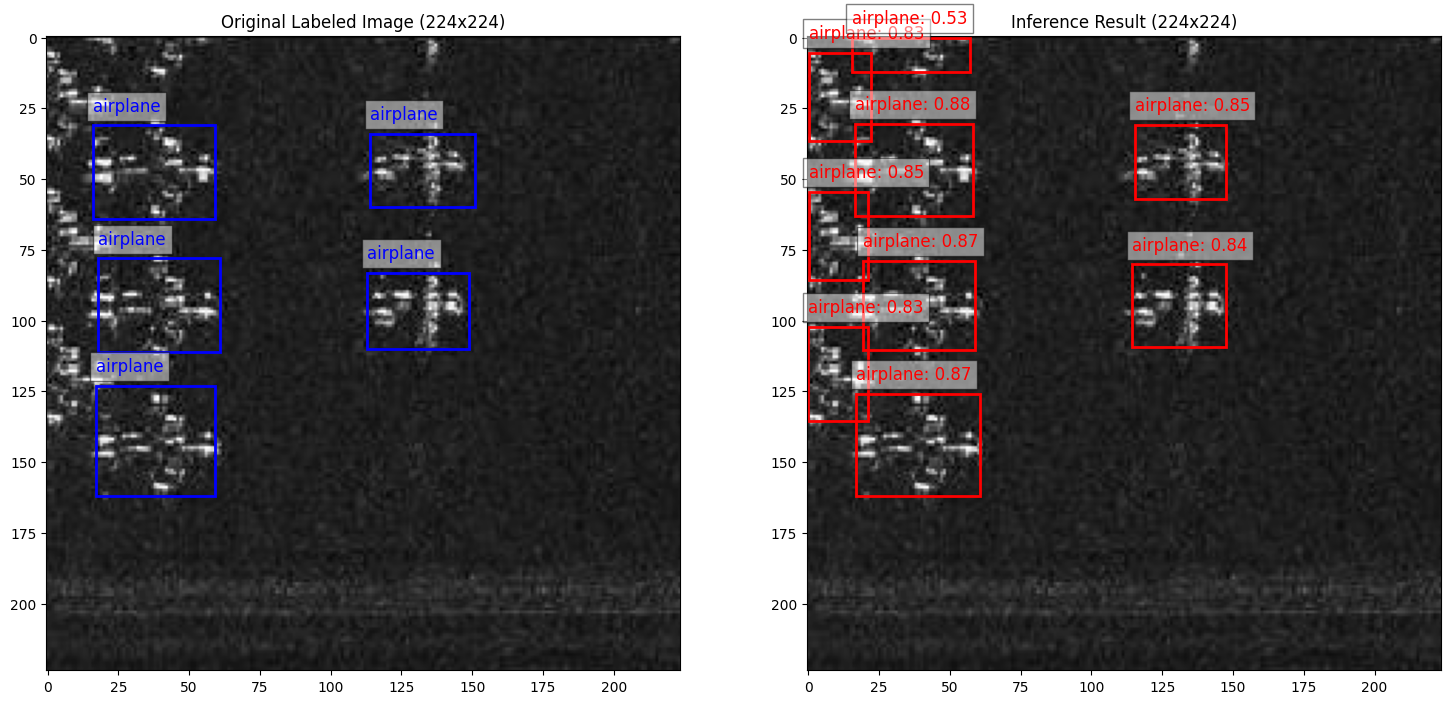

Inference Detections:
{'class': 'airplane', 'confidence': 0.8802257776260376, 'bbox': [16.355405807495117, 30.54337501525879, 58.256805419921875, 63.09149932861328]}
{'class': 'airplane', 'confidence': 0.8744091987609863, 'bbox': [16.916852951049805, 125.73080444335938, 60.47747802734375, 162.0443115234375]}
{'class': 'airplane', 'confidence': 0.8739297389984131, 'bbox': [19.152048110961914, 78.88470458984375, 58.82537078857422, 110.30001831054688]}
{'class': 'airplane', 'confidence': 0.847808301448822, 'bbox': [115.224365234375, 30.854045867919922, 147.65499877929688, 57.14675521850586]}
{'class': 'airplane', 'confidence': 0.8463076949119568, 'bbox': [0.03228187561035156, 54.495765686035156, 21.174976348876953, 85.5184555053711]}
{'class': 'airplane', 'confidence': 0.8433195948600769, 'bbox': [114.46388244628906, 80.08518981933594, 147.65113830566406, 109.26278686523438]}
{'class': 'airplane', 'confidence': 0.8278269171714783, 'bbox': [0.029775619506835938, 5.4474945068359375, 22.2547

In [27]:
# Load the trained YOLO model with the best weights for 224x224 image size
model = YOLO(best_weight_224_path)

test_image_path = os.path.join(test_images_224_path, test_image_name)

# Perform inference on the test image
results = model(test_image_path)  # Perform detection
detections = results[0].boxes  # Retrieve detection results from the first (and only) image

# Collect the detections in a structured format
detection_list = []
for box in detections:
    x_min, y_min, x_max, y_max = box.xyxy[0].tolist()  # Get bounding box coordinates
    confidence = box.conf[0].item()  # Get confidence score
    class_id = int(box.cls[0].item())  # Get class ID
    class_name = model.names[class_id]  # Get the class name using the model's label dictionary
    detection = {
        'class': class_name,
        'confidence': confidence,
        'bbox': [x_min, y_min, x_max, y_max]  # Format as [x_min, y_min, x_max, y_max]
    }
    detection_list.append(detection)

# Path to the corresponding label file
label_path = os.path.join(test_images_224_path.replace('images', 'labels'), test_image_name.replace('.jpg', '.txt'))

# Load original bounding boxes from the label file
original_boxes = []
with Image.open(test_image_path) as img:
    img_width, img_height = img.size
    
if os.path.exists(label_path):
    print("\nOriginal labeled detections for test image (contents of annotation file):")
    with open(label_path, 'r') as f:
        for line in f:
            print(line)
            parts = line.split()
            class_id = int(parts[0])
            x_center, y_center, width, height = map(float, parts[1:])
            x_min = (x_center - width / 2) * img_width
            y_min = (y_center - height / 2) * img_height
            x_max = x_min + width * img_width
            y_max = y_min + height * img_height
            original_boxes.append({
                'class': model.names[class_id],
                'bbox': [x_min, y_min, x_max, y_max]
            })

print("Expected number of detections:", len(original_boxes))

# Display the test image with both inference and original labeled bounding boxes side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

# Plot original labeled image
with Image.open(test_image_path) as img:
    ax1.imshow(img)
    for box in original_boxes:
        x_min, y_min, x_max, y_max = box['bbox']
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='blue', facecolor='none')
        ax1.add_patch(rect)
        ax1.text(x_min, y_min - 5, box['class'], color='blue', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    ax1.set_title('Original Labeled Image (224x224)')

# Plot inference result
with Image.open(test_image_path) as img:
    ax2.imshow(img)
    for det in detection_list:
        x_min, y_min, x_max, y_max = det['bbox']
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='red', facecolor='none')
        ax2.add_patch(rect)
        label = f"{det['class']}: {det['confidence']:.2f}"
        ax2.text(x_min, y_min - 5, label, color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_title('Inference Result (224x224)')

plt.show()

# Print detection list for inference results
print("Inference Detections:")
for det in detection_list:
    print(det)
print("Number of inference detections:", len(detection_list))


image 1/1 /home/tjriz/Documents/Senior-Design/datasets/SADD/hust-rslab-SAR-aircraft-data.v2i.yolov11.resize640/test/images/02544_bmp.rf.70f635e62d51bc7620ccd8f7ff65842c.jpg: 640x640 8 airplanes, 16.9ms
Speed: 0.9ms preprocess, 16.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

Original labeled detections for test image (contents of annotation file):
0 0.16741071428571427 0.21205357142857142 0.19196428571428573 0.14732142857142858

0 0.17633928571428573 0.421875 0.19196428571428573 0.14732142857142858

0 0.16964285714285715 0.6361607142857143 0.1875 0.17410714285714285

0 0.5915178571428571 0.20982142857142858 0.16517857142857142 0.11607142857142858

0 0.5848214285714286 0.43080357142857145 0.16071428571428573 0.12053571428571429
Expected number of detections: 5


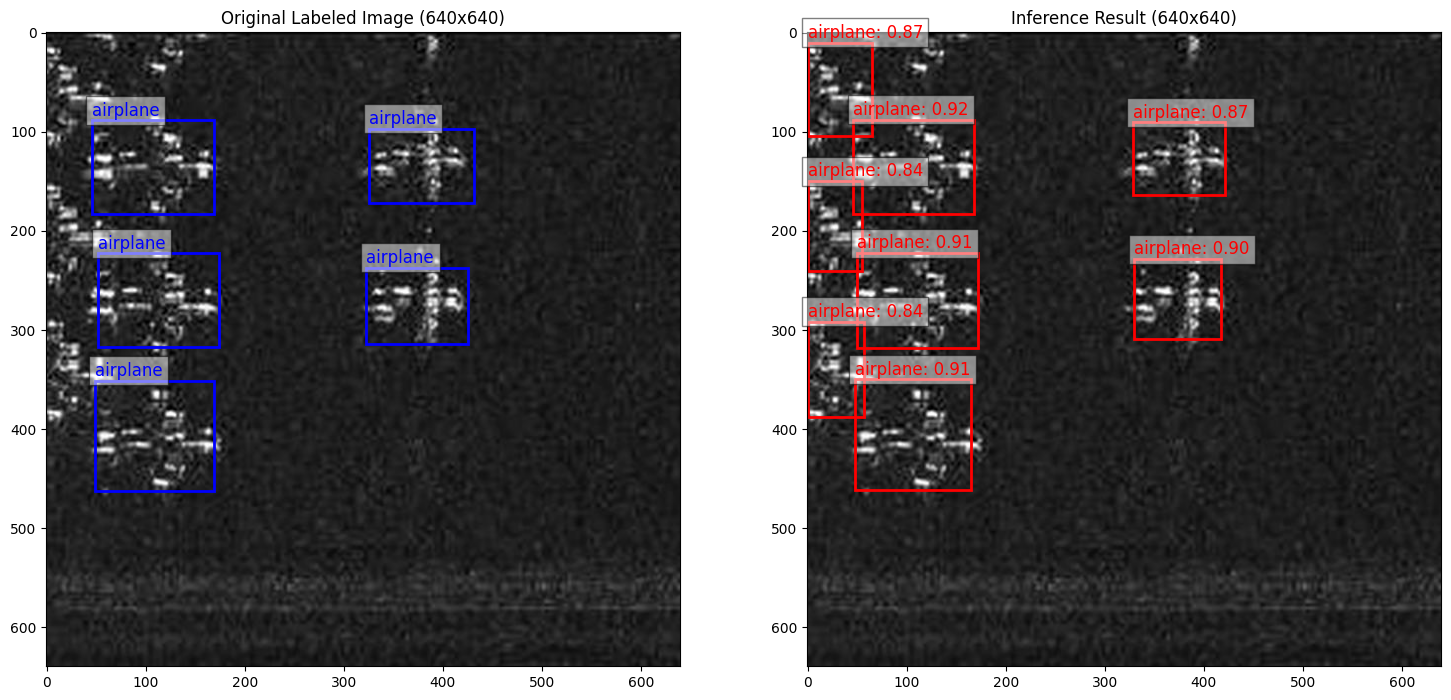

Inference Detections:
{'class': 'airplane', 'confidence': 0.9169049263000488, 'bbox': [46.05696105957031, 87.64875793457031, 168.17474365234375, 183.2086944580078]}
{'class': 'airplane', 'confidence': 0.9147552251815796, 'bbox': [49.557769775390625, 222.3483123779297, 171.6016845703125, 318.11688232421875]}
{'class': 'airplane', 'confidence': 0.9114342927932739, 'bbox': [47.907527923583984, 349.9161376953125, 165.38653564453125, 461.52777099609375]}
{'class': 'airplane', 'confidence': 0.9019904136657715, 'bbox': [329.91485595703125, 228.51519775390625, 417.3831787109375, 308.786376953125]}
{'class': 'airplane', 'confidence': 0.8667028546333313, 'bbox': [328.51153564453125, 90.52738952636719, 421.21966552734375, 163.98211669921875]}
{'class': 'airplane', 'confidence': 0.8652684688568115, 'bbox': [0.0, 10.143386840820312, 65.16525268554688, 104.4439697265625]}
{'class': 'airplane', 'confidence': 0.8446972370147705, 'bbox': [0.0, 149.89923095703125, 55.39009475708008, 241.0391845703125]}


In [28]:
# Load the trained YOLO model with the best weights for 640x640 image size
model = YOLO(best_weight_640_path)

test_image_path = os.path.join(test_images_640_path, test_image_name)

# Perform inference on the test image
results = model(test_image_path)  # Perform detection
detections = results[0].boxes  # Retrieve detection results from the first (and only) image

# Collect the detections in a structured format
detection_list = []
for box in detections:
    x_min, y_min, x_max, y_max = box.xyxy[0].tolist()  # Get bounding box coordinates
    confidence = box.conf[0].item()  # Get confidence score
    class_id = int(box.cls[0].item())  # Get class ID
    class_name = model.names[class_id]  # Get the class name using the model's label dictionary
    detection = {
        'class': class_name,
        'confidence': confidence,
        'bbox': [x_min, y_min, x_max, y_max]  # Format as [x_min, y_min, x_max, y_max]
    }
    detection_list.append(detection)

# Path to the corresponding label file
label_path = os.path.join(test_images_640_path.replace('images', 'labels'), test_image_name.replace('.jpg', '.txt'))

# Load original bounding boxes from the label file
original_boxes = []
with Image.open(test_image_path) as img:
    img_width, img_height = img.size
    
if os.path.exists(label_path):
    print("\nOriginal labeled detections for test image (contents of annotation file):")
    with open(label_path, 'r') as f:
        for line in f:
            print(line)
            parts = line.split()
            class_id = int(parts[0])
            x_center, y_center, width, height = map(float, parts[1:])
            x_min = (x_center - width / 2) * img_width
            y_min = (y_center - height / 2) * img_height
            x_max = x_min + width * img_width
            y_max = y_min + height * img_height
            original_boxes.append({
                'class': model.names[class_id],
                'bbox': [x_min, y_min, x_max, y_max]
            })

print("Expected number of detections:", len(original_boxes))

# Display the test image with both inference and original labeled bounding boxes side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

# Plot original labeled image
with Image.open(test_image_path) as img:
    ax1.imshow(img)
    for box in original_boxes:
        x_min, y_min, x_max, y_max = box['bbox']
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='blue', facecolor='none')
        ax1.add_patch(rect)
        ax1.text(x_min, y_min - 5, box['class'], color='blue', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    ax1.set_title('Original Labeled Image (640x640)')

# Plot inference result
with Image.open(test_image_path) as img:
    ax2.imshow(img)
    for det in detection_list:
        x_min, y_min, x_max, y_max = det['bbox']
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='red', facecolor='none')
        ax2.add_patch(rect)
        label = f"{det['class']}: {det['confidence']:.2f}"
        ax2.text(x_min, y_min - 5, label, color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    ax2.set_title('Inference Result (640x640)')

plt.show()

# Print detection list for inference results
print("Inference Detections:")
for det in detection_list:
    print(det)
print("Number of inference detections:", len(detection_list))